<a href="https://colab.research.google.com/github/ruthiang/Ruth_data690/blob/main/assignment_06/roll_dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Example
## Roll a Dice Twice or roll two dices
If we roll a dice twice, we will have two numbers, each is between 1 to 6. 
We want to find out the all possible combinations of the pairs and 
the frequency of the sum of each pair. 

In [87]:
import random
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
random.randint(1,6)

2

In [89]:
random.choice([1,2,3,4,5,6])

6

In [90]:
np.random.choice(["A","B","C"], p=[0.25,0.25,0.5])

'C'

In [91]:
team_count = {
    "A":0,
    "B":0,
    "C":0
}

for i in range(1000):
  team_picked = np.random.choice(["A","B","C"], p=[0.25,0.25,0.5])
  team_count[team_picked] += 1

print(team_count)

{'A': 246, 'B': 223, 'C': 531}


## Step 1 - Simulate the Experiments
- Use `range(1,7)` to present the six possible numbers of a dice
- Use a tuple `(x, y)` to represent the result of two rolls
- Generate the outcomes using List Comprehension.
- Represent the outcomes using a Python Dictionary.


In [92]:
pair_dict = {(i,j): i+j for i in range(1,7) for j in range(1,7)}
pair_dict

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

In [93]:
len(pair_dict)

36

In [94]:
pair_dict.items()

dict_items([((1, 1), 2), ((1, 2), 3), ((1, 3), 4), ((1, 4), 5), ((1, 5), 6), ((1, 6), 7), ((2, 1), 3), ((2, 2), 4), ((2, 3), 5), ((2, 4), 6), ((2, 5), 7), ((2, 6), 8), ((3, 1), 4), ((3, 2), 5), ((3, 3), 6), ((3, 4), 7), ((3, 5), 8), ((3, 6), 9), ((4, 1), 5), ((4, 2), 6), ((4, 3), 7), ((4, 4), 8), ((4, 5), 9), ((4, 6), 10), ((5, 1), 6), ((5, 2), 7), ((5, 3), 8), ((5, 4), 9), ((5, 5), 10), ((5, 6), 11), ((6, 1), 7), ((6, 2), 8), ((6, 3), 9), ((6, 4), 10), ((6, 5), 11), ((6, 6), 12)])

## Step 2 Create a Pandas Dataframe
- Use the `items()` function to get the list of items in a dictionary
- Specify column names using `columns=` option

In [95]:
df = pd.DataFrame(data=pair_dict.items(), columns=["Pair", "Pair_Sum"])
df

,Pair,Pair_Sum
0,"(1, 1)",2
1,"(1, 2)",3
2,"(1, 3)",4
3,"(1, 4)",5
4,"(1, 5)",6
5,"(1, 6)",7
6,"(2, 1)",3
7,"(2, 2)",4
8,"(2, 3)",5
9,"(2, 4)",6


In [96]:
df.dtypes

Pair        object
Pair_Sum     int64
dtype: object

## Step 3 - Convert the Tuples to Strings
The `join()` function only take strings as inputs. Tuples don't work.

In [97]:
df["Pair"] = df["Pair"].astype(str)
df.head()

,Pair,Pair_Sum
0,"(1, 1)",2
1,"(1, 2)",3
2,"(1, 3)",4
3,"(1, 4)",5
4,"(1, 5)",6


In [98]:
df.dtypes

Pair        object
Pair_Sum     int64
dtype: object

## Step 4 -  Aggregate the Outcomes 
- Use Pandas `groupby()` Function
- Use `NamedAgg=` option to specify the column name

In [99]:
name_list = ["jay","john","jerry","jack"]

", ".join(name_list)

'jay, john, jerry, jack'

In [100]:
df_agg = df.groupby("Pair_Sum").agg(
    Pair_List=pd.NamedAgg(column="Pair", aggfunc=", ".join),
    Pair_Count=pd.NamedAgg(column="Pair", aggfunc="count")
).reset_index()

df_agg

,Pair_Sum,Pair_List,Pair_Count
0,2,"(1, 1)",1
1,3,"(1, 2), (2, 1)",2
2,4,"(1, 3), (2, 2), (3, 1)",3
3,5,"(1, 4), (2, 3), (3, 2), (4, 1)",4
4,6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5
5,7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6
6,8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5
7,9,"(3, 6), (4, 5), (5, 4), (6, 3)",4
8,10,"(4, 6), (5, 5), (6, 4)",3
9,11,"(5, 6), (6, 5)",2


## Step 5 - Visualize the Frequency of Sum 
- Pandas `bar()` plot use the row index `Pair_Sum` as the categorical variable
- Pandas `bar()` plot will plot all numerical variable columns
- Here the categorical variable column `Pair_List` is ignored
- Here we only have one numerical column `Pair_Count`

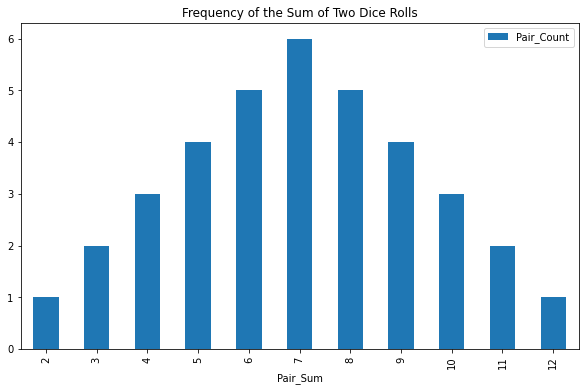

In [101]:
df_agg.plot.bar(x="Pair_Sum", y="Pair_Count", figsize=(10,6), title="Frequency of the Sum of Two Dice Rolls")

In [102]:
df_agg2 = df_agg.reset_index()
df_agg2

,index,Pair_Sum,Pair_List,Pair_Count
0,0,2,"(1, 1)",1
1,1,3,"(1, 2), (2, 1)",2
2,2,4,"(1, 3), (2, 2), (3, 1)",3
3,3,5,"(1, 4), (2, 3), (3, 2), (4, 1)",4
4,4,6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5
5,5,7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6
6,6,8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5
7,7,9,"(3, 6), (4, 5), (5, 4), (6, 3)",4
8,8,10,"(4, 6), (5, 5), (6, 4)",3
9,9,11,"(5, 6), (6, 5)",2


In [103]:
fig = px.bar(df_agg2, x="Pair_Sum", y="Pair_Count", title = "Frequency of the Sum of Two Dice Rolls")
fig.show()

## Step 6 - Calculate Probability of Each Sum 

In [104]:
total_count = df_agg["Pair_Count"].sum()
df_agg["Probability(%)"] = round(100 * df_agg["Pair_Count"] / total_count, 2)
df_agg

,Pair_Sum,Pair_List,Pair_Count,Probability(%)
0,2,"(1, 1)",1,2.78
1,3,"(1, 2), (2, 1)",2,5.56
2,4,"(1, 3), (2, 2), (3, 1)",3,8.33
3,5,"(1, 4), (2, 3), (3, 2), (4, 1)",4,11.11
4,6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5,13.89
5,7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6,16.67
6,8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5,13.89
7,9,"(3, 6), (4, 5), (5, 4), (6, 3)",4,11.11
8,10,"(4, 6), (5, 5), (6, 4)",3,8.33
9,11,"(5, 6), (6, 5)",2,5.56


## Step 7 - Visualize the Probability of Sum

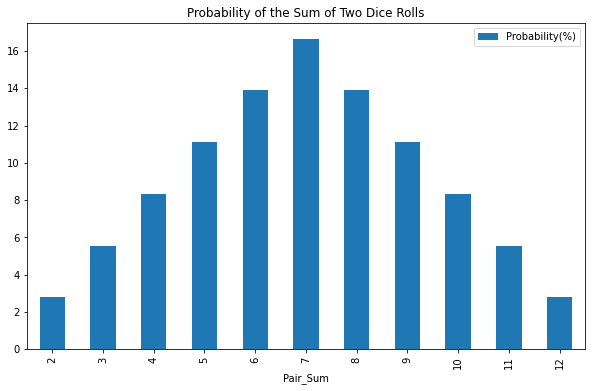

In [105]:
df_agg.plot.bar(x="Pair_Sum", y="Probability(%)", figsize=(10,6), title="Probability of the Sum of Two Dice Rolls")

## Homework Question 1
Produce the above plot using plotly express

In [106]:
fig = px.bar(df_agg, x='Pair_Sum', y='Probability(%)',title= 'Probability of the Sum of Two Dice Roll')
fig.show()

## Step 8 - Visualize both Frequency and Probability in one Chart
- Pandas `bar()` plot use the row index `Pair_Sum` as the categorical variable
- Pandas `bar()` plot will plot all numerical variable columns
- Here the categorical variable column `Pair_List` is ignored
- Here we have two numerical columns:
    - `Pair_Count` 
    - `Probability`

In [107]:
df_agg.head()

,Pair_Sum,Pair_List,Pair_Count,Probability(%)
0,2,"(1, 1)",1,2.78
1,3,"(1, 2), (2, 1)",2,5.56
2,4,"(1, 3), (2, 2), (3, 1)",3,8.33
3,5,"(1, 4), (2, 3), (3, 2), (4, 1)",4,11.11
4,6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5,13.89


Text(0, 0.5, 'Probability')

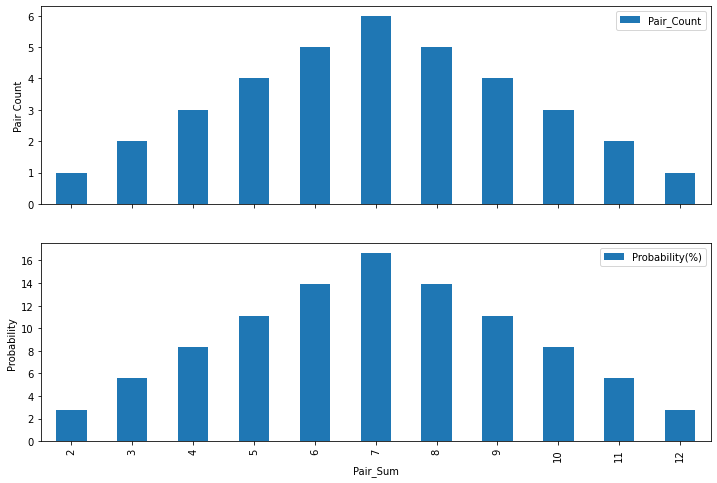

In [108]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)

df_agg.plot.bar(ax=ax1, x="Pair_Sum", y="Pair_Count")
ax1.set_ylabel("Pair Count")

df_agg.plot.bar(ax=ax2, x="Pair_Sum", y="Probability(%)")
ax2.set_ylabel("Probability")

## Homework Question 2
Produce the above plot using plotly Express: 
- first melt the dataframe into longframe
- Make two bar charts using Facets parameter from Plotly Express
- reference: 
https://stackoverflow.com/questions/58167028/single-axis-caption-in-plotly-express-facet-plot



In [109]:
df_melt = df_agg.melt(id_vars="Pair_Sum", var_name="Type_Stats", value_name="Stats_Value", value_vars=["Pair_Count",	"Probability(%)"])
df_melt

,Pair_Sum,Type_Stats,Stats_Value
0,2,Pair_Count,1.00
1,3,Pair_Count,2.00
2,4,Pair_Count,3.00
3,5,Pair_Count,4.00
4,6,Pair_Count,5.00
5,7,Pair_Count,6.00
6,8,Pair_Count,5.00
7,9,Pair_Count,4.00
8,10,Pair_Count,3.00
9,11,Pair_Count,2.00


In [115]:
fig = px.bar(df_melt, x="Pair_Sum", y="Stats_Value", facet_row="Type_Stats")
fig.show()

## Step 9 - Simulate the Experiment 1000 Times
We will simulate the rolling of a dice twice experiment 1000 times and find out if the above 
frequency distribution of the sum of the two rolls holds

In [70]:
sum_list = []

for i in range(1000):
    sum_list.append(random.randint(1,6) + random.randint(1,6))

sum_list[:20]

[3, 5, 4, 2, 10, 10, 4, 7, 11, 6, 5, 6, 7, 7, 5, 6, 5, 10, 11, 3]

In [71]:
unique_list = set(sum_list)
unique_list

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [72]:
frequency = [sum_list.count(x) for x in unique_list]
frequency

[32, 52, 93, 101, 126, 171, 137, 108, 83, 71, 26]

In [73]:
# Calculate probability (empirical probability vs theoretical probability)

#df_agg["Exp_1000"] = [round(x/10, 2) for x in frequency]
#df_agg

In [74]:
# Alternative to use list Comprehension:
# import numpy as np
# frequency = np.array(frequency)         # convert a Python list to a Numpy array
# probability = frequency / 10            # This division does not work for Python list

In [75]:
#df_agg.iloc[:,2:].plot.bar(figsize=(10,6), title="Probability of the Sum of Two Dice Rolls")

## Step 10 - Simulate the Experiment for different times

In [76]:
def simulate(N):
    sum_list = []
    for i in range(N):
        sum_list.append(random.randint(1,6) + random.randint(1,6))
    unique_list = set(sum_list)
    frequency = [sum_list.count(x) for x in unique_list]
    df_agg[f"Exp_{N}"] = [round(100 * x/N, 2) for x in frequency] 

In [77]:
df_agg = pd.DataFrame(data=unique_list, columns=["Pair_Sum"])

df_agg


,Pair_Sum
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,10
9,11


In [78]:
for n in range(100000, 1000000, 200000):
    simulate(n)
    
df_agg

,Pair_Sum,Exp_100000,Exp_300000,Exp_500000,Exp_700000,Exp_900000
0,2,2.85,2.77,2.74,2.74,2.79
1,3,5.62,5.58,5.52,5.57,5.52
2,4,8.31,8.30,8.39,8.30,8.32
3,5,11.05,11.12,11.13,11.14,11.11
4,6,13.99,13.98,13.94,13.90,13.86
5,7,16.55,16.68,16.68,16.74,16.70
6,8,13.86,13.86,13.85,13.89,13.91
7,9,11.07,11.05,11.08,11.10,11.12
8,10,8.48,8.37,8.33,8.30,8.31
9,11,5.49,5.52,5.59,5.55,5.56


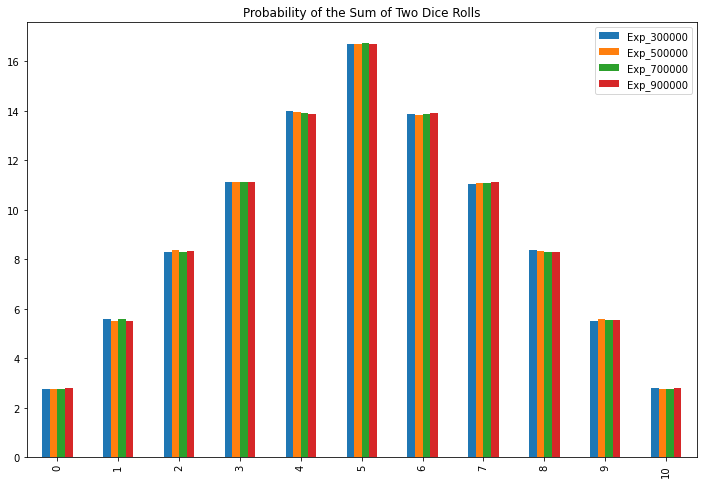

In [79]:
df_agg.iloc[:,2:].plot.bar(figsize=(12,8), title="Probability of the Sum of Two Dice Rolls")

## Homework Question 3 (Optional)
- Produce the above chart using Plotly Express
- You need to melt the dataframe from wide format to long format first. Refer to question #2.

In [80]:
# Your code here

## The End.